In [3]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure plotting style
sns.set(style="whitegrid")
%matplotlib inline


In [5]:
#LOAD DATASET
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#BASIC INFO & MISSING VALUES
#checking data info
print(df.info())
#checks missing values
print ("\n Missing values: \n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 Missing values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked  

In [7]:
#DESCRIPTIVE STATISTICS
# ShowS summary statistics
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


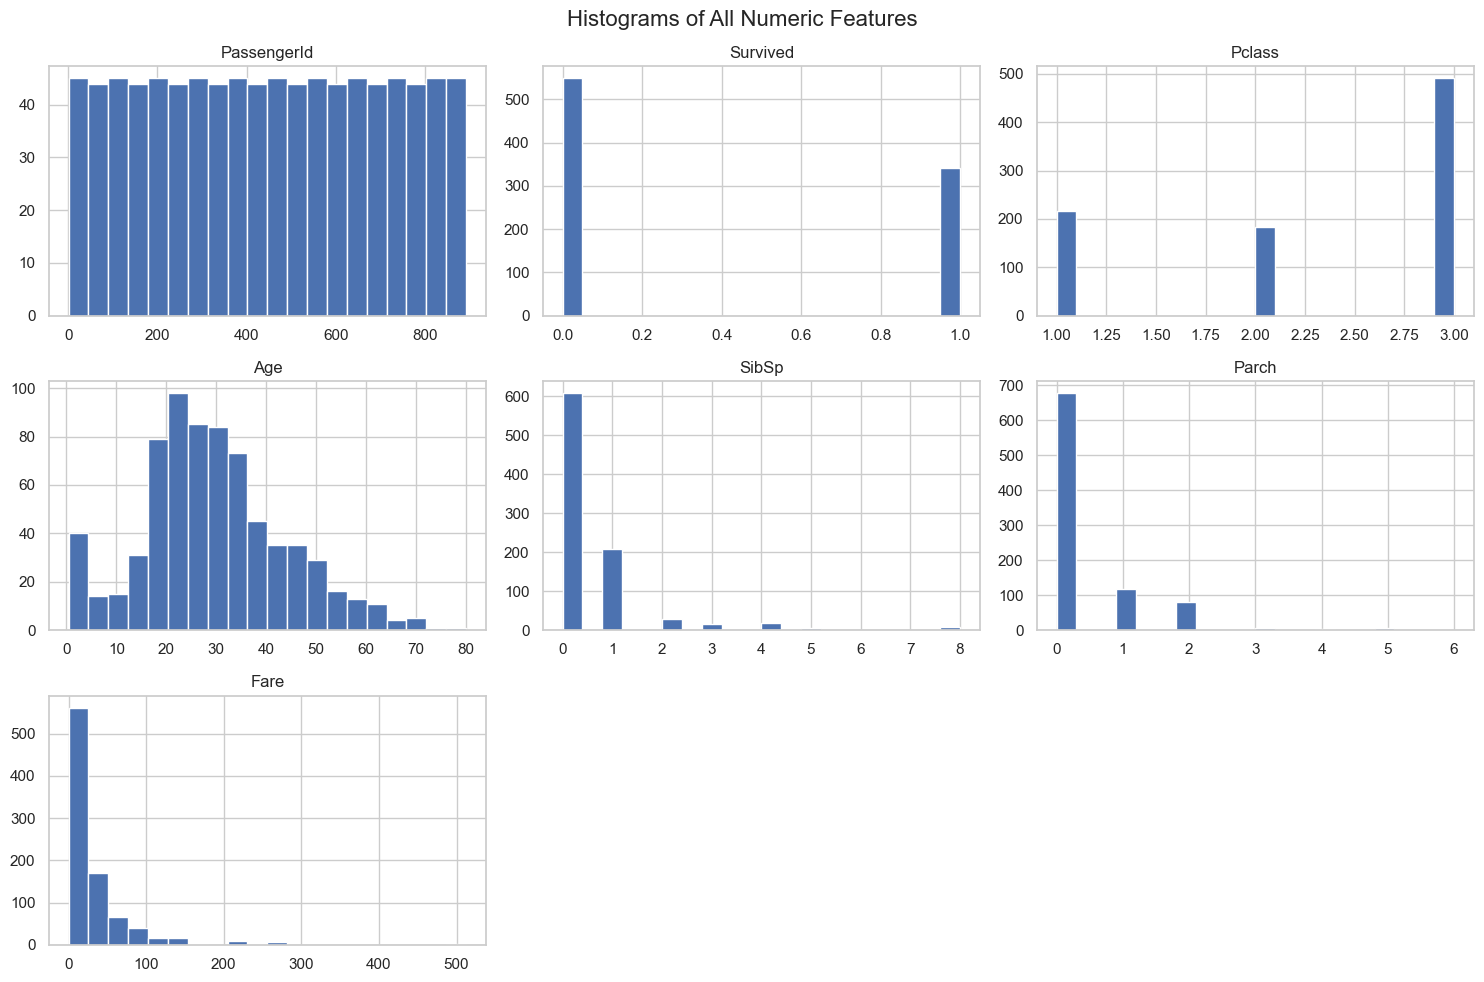

In [8]:
#HISTOGRAMS OF NUMERIC FEATURES
# Plots histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of All Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

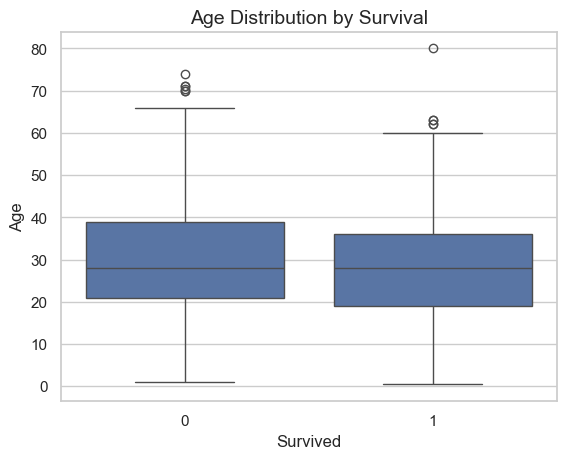

In [10]:
#BOXPLOT - AGE vs SURVIVED
# Boxplot to compare age distribution by survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival", fontsize=14)
plt.show()

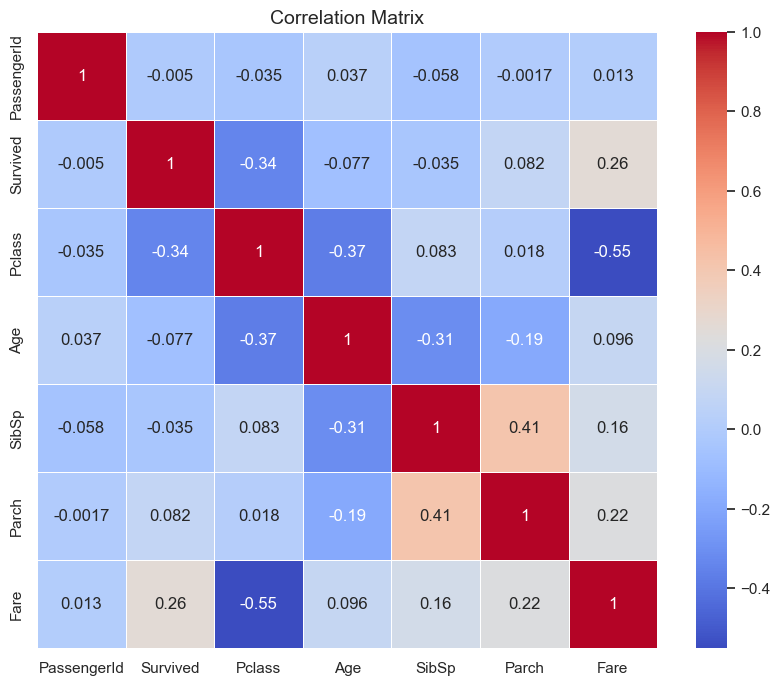

In [11]:
#CORRELATION MATRIX
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

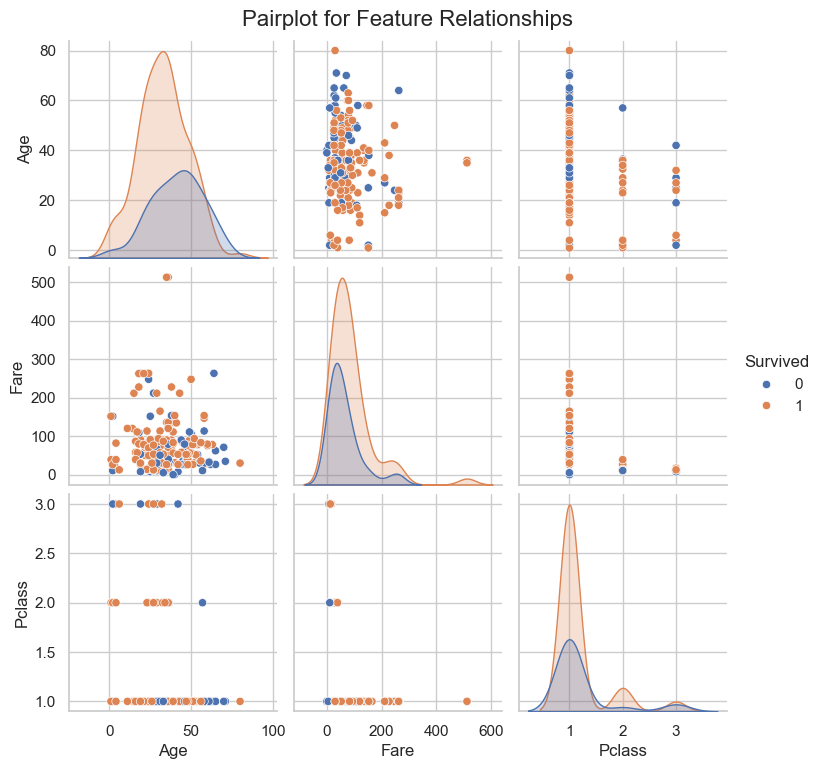

In [12]:
#PAIRPLOT OF KEY FEATURES
# Pairplot to see relationships
sns.pairplot(df.dropna(), hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.suptitle("Pairplot for Feature Relationships", y=1.02, fontsize=16)
plt.show()

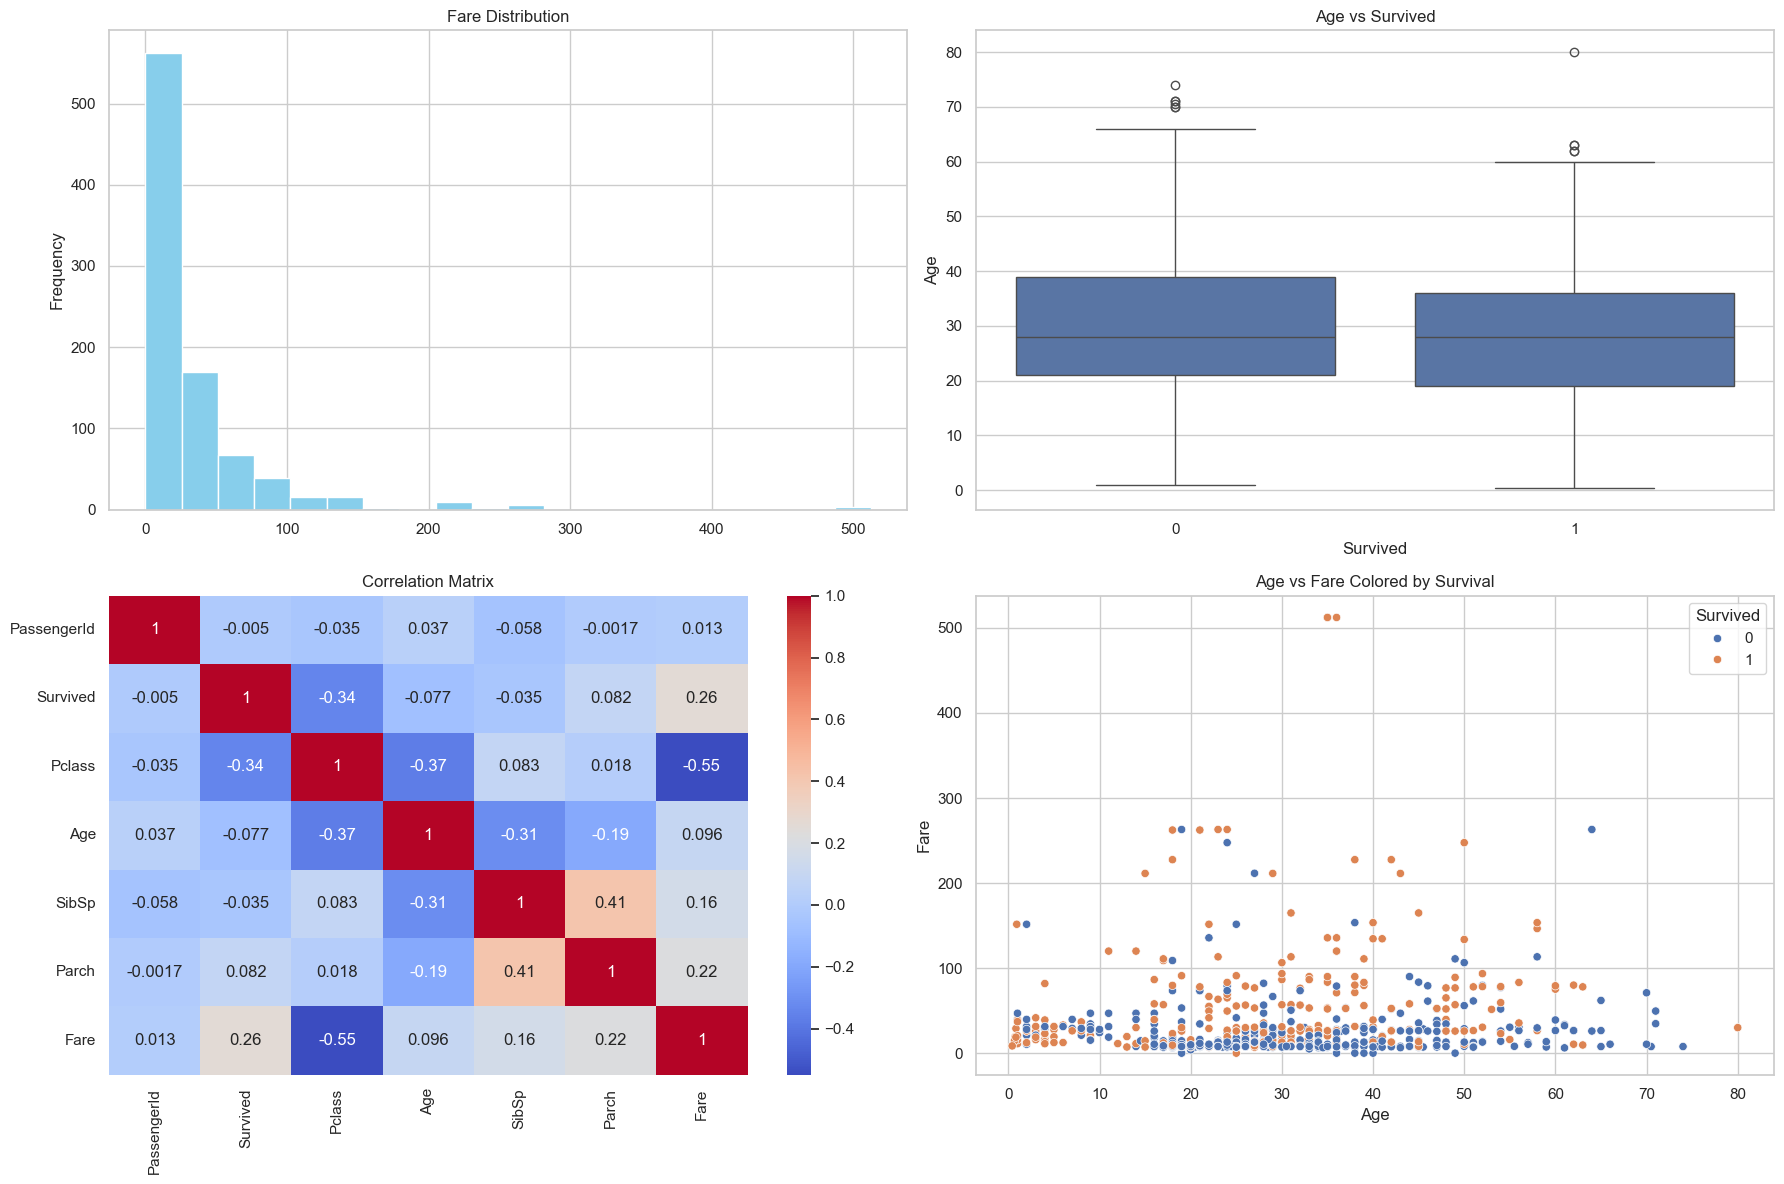

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Histogram (Fare)
df['Fare'].plot(kind='hist', bins=20, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Fare Distribution")

# Boxplot (Age vs Survived)
sns.boxplot(x='Survived', y='Age', data=df, ax=axs[0, 1])
axs[0, 1].set_title("Age vs Survived")

# Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title("Correlation Matrix")

# Scatter Plot (Age vs Fare, color by Survived)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, ax=axs[1, 1])
axs[1, 1].set_title("Age vs Fare Colored by Survival")

# Layout & Saving
plt.tight_layout()
plt.savefig("results.png")
plt.show()